# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We **TEAM-CW3**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Belief Analysis Challenge

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat or not. This would add to their market research efforts in gauging how their product/service may be received. The sentiments are classified numerically, see below for their meaning:

### Sentiment value: Sentiment description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of classifying people's belief when is comes to carbon threat by products;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement is given to CW3 by, the senior data scientist (Claudia Wilson), via email reads as follow:

> In this project Explore Data Science Academy's TEAM-CW3 is tasked to solve this challenge by creating an Advanced Classification Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.
 
Additionally we provide these companies with notebook containing explanations of what the main outcomes are. 

<!-- <img src = 'https://media3.giphy.com/media/k4ZItrTKDPnSU/200.gif'></img> -->
<img src = 'https://media3.giphy.com/media/k4ZItrTKDPnSU/200.gif'
     width= '700'  />


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>
<br>
<br> &emsp;&emsp;&emsp;&emsp; 1.1) Import comet ML & Experiments
<br> &emsp;&emsp;&emsp;&emsp; 1.2) Import python modules and packages


<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>
<br>
<br> &emsp;&emsp;&emsp;&emsp; 3.1) Visualizing data set to look at features & target
<br> &emsp;&emsp;&emsp;&emsp; 3.2) Analyzing distributions of features per sentiment
<br> &emsp;&emsp;&emsp;&emsp; 3.3) Tweet length distribution
<br> &emsp;&emsp;&emsp;&emsp; 3.4) WordCloud for most frequent words before data cleaning

<a href=#four>4. Sentiment Analysis</a>
<br> &emsp;&emsp;&emsp;&emsp; 4.1) Data cleaning
<br> &emsp;&emsp;&emsp;&emsp; 4.2) WordCloud for most frequent words after data cleaning
<br> &emsp;&emsp;&emsp;&emsp; 4.2) Building vectorizer

<a href=#five>5. Modeling</a>
<br> &emsp;&emsp;&emsp;&emsp;5.1) SupportVector Classifier
<br> &emsp;&emsp;&emsp;&emsp;5.2) LogisticRegression Classifier
<br> &emsp;&emsp;&emsp;&emsp;5.3) RandomForest Classifier
<br> &emsp;&emsp;&emsp;&emsp;5.4) Linear SupportVector Classifier
<br> &emsp;&emsp;&emsp;&emsp;5.5) GradientBoosting Classifier
<br> &emsp;&emsp;&emsp;&emsp;5.6) AdaBoost Classifier
<br> &emsp;&emsp;&emsp;&emsp;5.7) CatBoost Classifier
<br> &emsp;&emsp;&emsp;&emsp;5.8) Stacking Classifier

<a href=#six>6. Model Performance</a>
<br> &emsp;&emsp;&emsp;&emsp; 6.1) Model accuracy & F1-scores
<br> &emsp;&emsp;&emsp;&emsp; 6.2) Model comparisson

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we are importing, and briefly discussing, the libraries that will be used throughout the analysis and modelling. |

---

In [1]:
# %pip install -U comet_ml unidecode nltk scikit-learn==0.24.2 contractions
# %pip install emoji
# %pip install pyspellchecker
# %pip install ftfy

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# probably should not leak the api key here... but in this context it's the easiest
# remember to call experiment.end()
def create_experiment():
    return Experiment(
        api_key='qyBYUW3bdXWZMKz3qXMeU6Dm4',
        project_name='climate-change-tweet-classification',
        workspace='thulaninyama',
    )

def log_results(experiment, params: dict, metrics: dict):
    # Log our parameters and results
    experiment.log_parameters(params)
    experiment.log_metrics(metrics)

# should not be used alone, use cometize_model instead
def __record_run(experiment, params, y_true, y_pred):
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average='weighted'),
        "recall": recall_score(y_true, y_pred, average='weighted'),
        "f1": f1_score(y_true, y_pred, average='weighted'),
    }
    
    log_results(experiment, params, metrics)
    
def cometize_model(model, _X, _y, notes='<no notes>', model_type='<not given>'):
    exp = create_experiment()
    
    X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.20, shuffle=True, random_state=42)
    mod = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    params = model.get_params(deep=True)
    
    exp.log_other(key="notes", value=notes)
    exp.log_other(key="model_type", value=model_type)
    
    __record_run(exp, params, y_test, y_pred)
        
    exp.end()


In [3]:
# numpy is used to perform mathematical operations on arrays
import numpy as np
# pandas is used analyzing, cleaning, exploring, and data manipulation in dataframes.
import pandas as pd
from pandas import MultiIndex

#Below are comprehensive libraries for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
from wordcloud import WordCloud
from plotly import graph_objects as go
# set plot style
sns.set()
#Regular Expression used for data cleaning
import re

#Text processing packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

#Model evaluation packages
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, precision_score,  recall_score

#Packages to split the data for testing and training
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Modelling Packages
from catboost import Pool, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#
from sklearn.model_selection import GridSearchCV
# from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

#Imbalanced data processing packages
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTEENN, SMOTETomek

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import shap

In [4]:
# global constants
random_state = 42
from string import punctuation

eng_stopword_set = set(stopwords.words('english'))
punctuation_set = set([p for p in punctuation])

print("Stopwords:", len(eng_stopword_set))
print("Punctuation:", len(punctuation_set))

Stopwords: 179
Punctuation: 32


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are loading the data from the `df_train` file into a DataFrame. |

---

Below we connect and load publicly available train and test data set from TEAM-CW3 data repository to train and test Pandas dataframes respectively 

In [5]:
# connect and load train and test data sets
df_train = pd.read_csv('https://raw.githubusercontent.com/TEAM-CW3/classification-predict-streamlit-data/main/train.csv') # load train data set
df_test = pd.read_csv('https://raw.githubusercontent.com/TEAM-CW3/classification-predict-streamlit-data/main/test_with_no_labels.csv')  # load test data set
df_train_copy = df_train.copy() # copy train data set

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we are performing an in-depth analysis of all the variables in the DataFrame. |


<img src = 'Quotefancy-1733422-3840x2160.jpg'
     width= '500' />

### 3.1) Visualizing data set to look at features & target

In [6]:
# look at dataframe features
df_train_copy.columns = [col.replace(" ","_") for col in df_train_copy.columns] # remove whitespace in feature names if any
df_train_copy.head() # visualize train dataframe

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

##### Below we look at the features, number of observations per feature and the data type of the features

In [7]:
# look at data types of features
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


##### Below we inspect statistics of features for each sentiment by looking at total count of observations, unique amount of observations and the most frequent observations for each sentiment

In [8]:
# look at statistics for non-numerical features
df_train.groupby('sentiment').describe(include=['object']).T

sentiment                                                      -1  \
message count                                                1296   
        unique                                               1222   
        top     RT @realDonaldTrump: The concept of global war...   
        freq                                                   22   

sentiment                                                       0  \
message count                                                2353   
        unique                                               2245   
        top     RT @ULTRAVlOLENCE: Interviewer: 'What do you t...   
        freq                                                   20   

sentiment                                                       1  \
message count                                                8530   
        unique                                               7224   
        top     RT @StephenSchlegel: she's thinking about how ...   
        freq                                                  307   

sentiment                                                       2  
message count                                                3640  
        unique                                               3542  
        top     RT @business: China tells Trump climate change...  
        freq                                                   12

##### Below we inspect the number of rows and columns to view number of observations for each feature in the train data set

In [9]:
# look at number of columns and rows
print('Number of columns: ', df_train_copy.shape[1])
print('-------------------')
print('Number of rows   : ', df_train_copy.shape[0])

Number of columns:  3
-------------------
Number of rows   :  15819


##### Below we have a look at number data types collectively for all features

In [10]:
# look at number of data types
print('Count number columns per data type:')
print('----------------------------------')
print(df_train_copy.dtypes.value_counts())
print('----------------------------------')

Count number columns per data type:
----------------------------------
int64     2
object    1
dtype: int64
----------------------------------


##### Below we look for missing values in the train data set for every column

In [11]:
df_train_copy.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

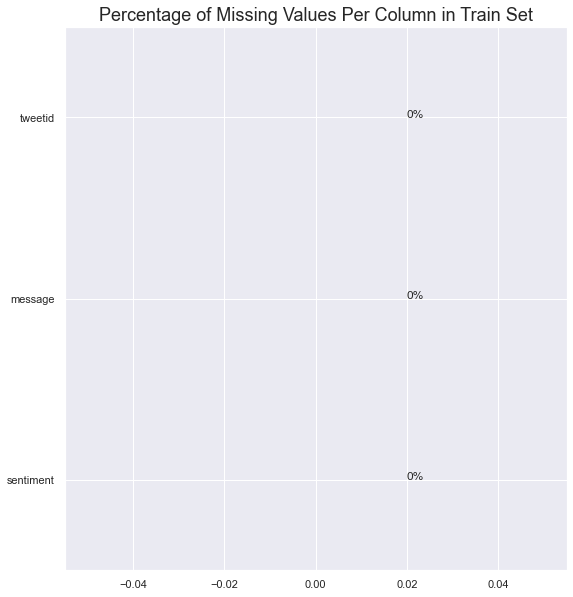

In [12]:
# plot missing values in train set
ax = df_train_copy.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10), color='tab:red')
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':18})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_train.shape[0])*100, fontdict={'size':22})
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Train data set has no empty values

### 3.2) Analyzing the distributions of the features  per sentiment (Positive, Negative, Neutral, News)

Text(0, 0.5, 'Density')

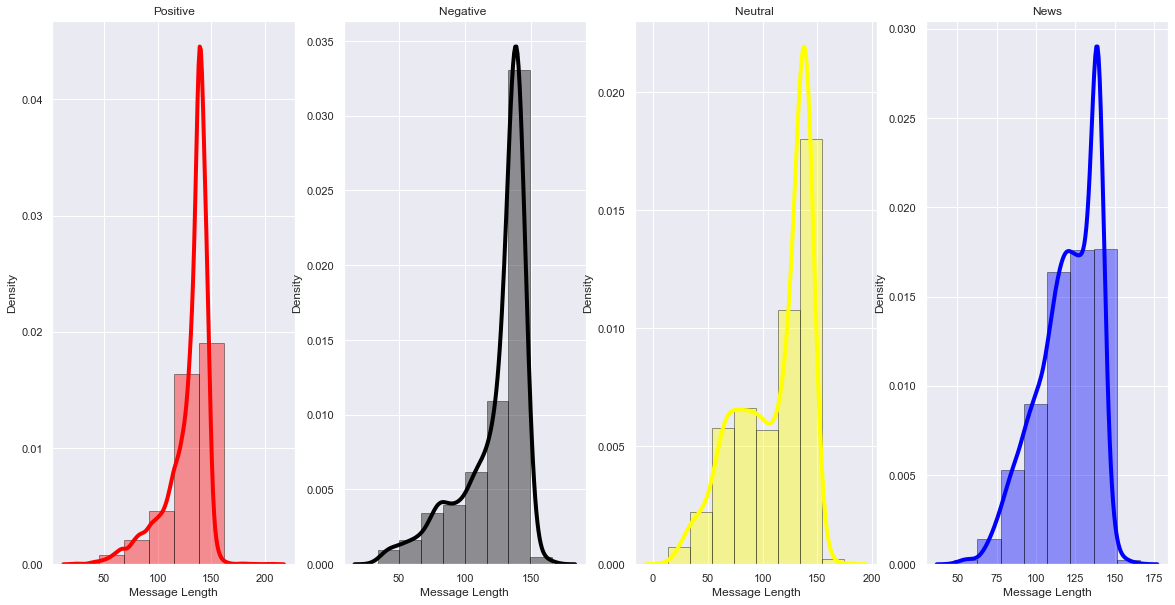

In [13]:
# distribution plots for sentiment
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,10))

# positive
sns.distplot(df_train_copy[df_train_copy['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'red', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}) # set line graph pixels
ax1.set_title('Positive') # set graph title
ax1.set_xlabel('Message Length') # label the x-axis
ax1.set_ylabel('Density') # label the y-axis

# negative 
sns.distplot(df_train_copy[df_train_copy['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'black', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}) # set line graph pixels
ax2.set_title('Negative ') # set graph title
ax2.set_xlabel('Message Length') # label the x-axis
ax2.set_ylabel('Density') # label the y-axis

# neutral 
sns.distplot(df_train_copy[df_train_copy['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'yellow',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}) # set line graph pixels
ax3.set_title('Neutral ') # set graph title
ax3.set_xlabel('Message Length') # label the x-axis
ax3.set_ylabel('Density') # label the y-axis

# news
sns.distplot(df_train_copy[df_train_copy['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}) # set line graph pixels
ax4.set_title('News') # set graph title
ax4.set_xlabel('Message Length') # label the x-axis
ax4.set_ylabel('Density')  # label the y-axis

By observing the graphs you can see that the average length for all opinions is relatively the same, this may be due to that every tweet has a word limit. However when we comparing the density between negative and positive sentiments there is noticable difference. We will do more analysis to figure out what needs to be done at sentimental analysis stage.

Color Key :

- Red     : Positive
- Black   : Negative
- Neutral : Yellow
- Blue    : News

##### Below we look at the unique values of the sentiment

In [14]:
# look at unique values in the columns that have object data type
print('Unique values in \'Sentiment\' column: ' + str(df_train_copy.sentiment.unique()))

Unique values in 'Sentiment' column: [ 1  2  0 -1]


With the amount of unique values we can see that we have multi-class labels

##### Below we have a look at feature distributions of observations by sentiment

In [15]:
# have a look at feature distributions
print("Distribution of messages per sentiment : ")
count = df_train_copy.groupby("sentiment").count()["message"].reset_index().sort_values(by="message", ascending=False)
count.style.background_gradient(cmap="Reds")
# df_train_copy.set_index("sentiment", inplace=True)

Distribution of messages per sentiment : 


##### Analysis proof is as follows:

- 1 Positive tweets: there is 8530 tweets that support the belief of man-made climate changes.

- -1 Negative tweets: there is 1296 tweets that does not support the believe in man-made climate changes.

- 0 Neutral tweets: there 2353 tweets that neither support nor refute the belief of man-made climate changes.

- 2 News tweets: there 3640 tweets that link to factual news about climate changes.

In [16]:
working_df = df_train_copy
# labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

<a id="subsection-two"></a>
### 3.3) Tweet length distribution 
From the plots below we can see that tweets that fall in the pro climate change class are generally longer and the shortest tweets belong to the anti climate change class.
We also notice that neutral climate change tweets tend to have the most variability in tweet length. 

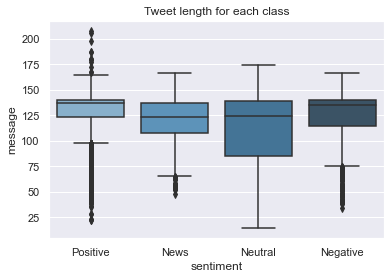

In [17]:
# Plot the distribution of the length tweets for each class using a box plot
df = df_train_copy['message'].str.len()
sns.boxplot(x=df_train_copy['sentiment'], y=df, data=df_train_copy, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

##### Below we look at the percentage of messages per sentiment out of the total message

In [18]:
def update(df):
    
    """
    This function creates a copy of the original train data and 
    renames the classes, converting them from numbers to words
    
    Input: 
    df: original dataframe
        datatype: dataframe
    
    Output:
    df: modified dataframe
        datatype: dataframe 
        
    """

    df = df_train.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

df = update(df_train)
df.head()

sentiment                                            message  tweetid
0       Pro  PolySciMajor EPA chief doesn't think carbon di...   625221
1       Pro  It's not like we lack evidence of anthropogeni...   126103
2      News  RT @RawStory: Researchers say we have three ye...   698562
3       Pro  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4       Pro  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

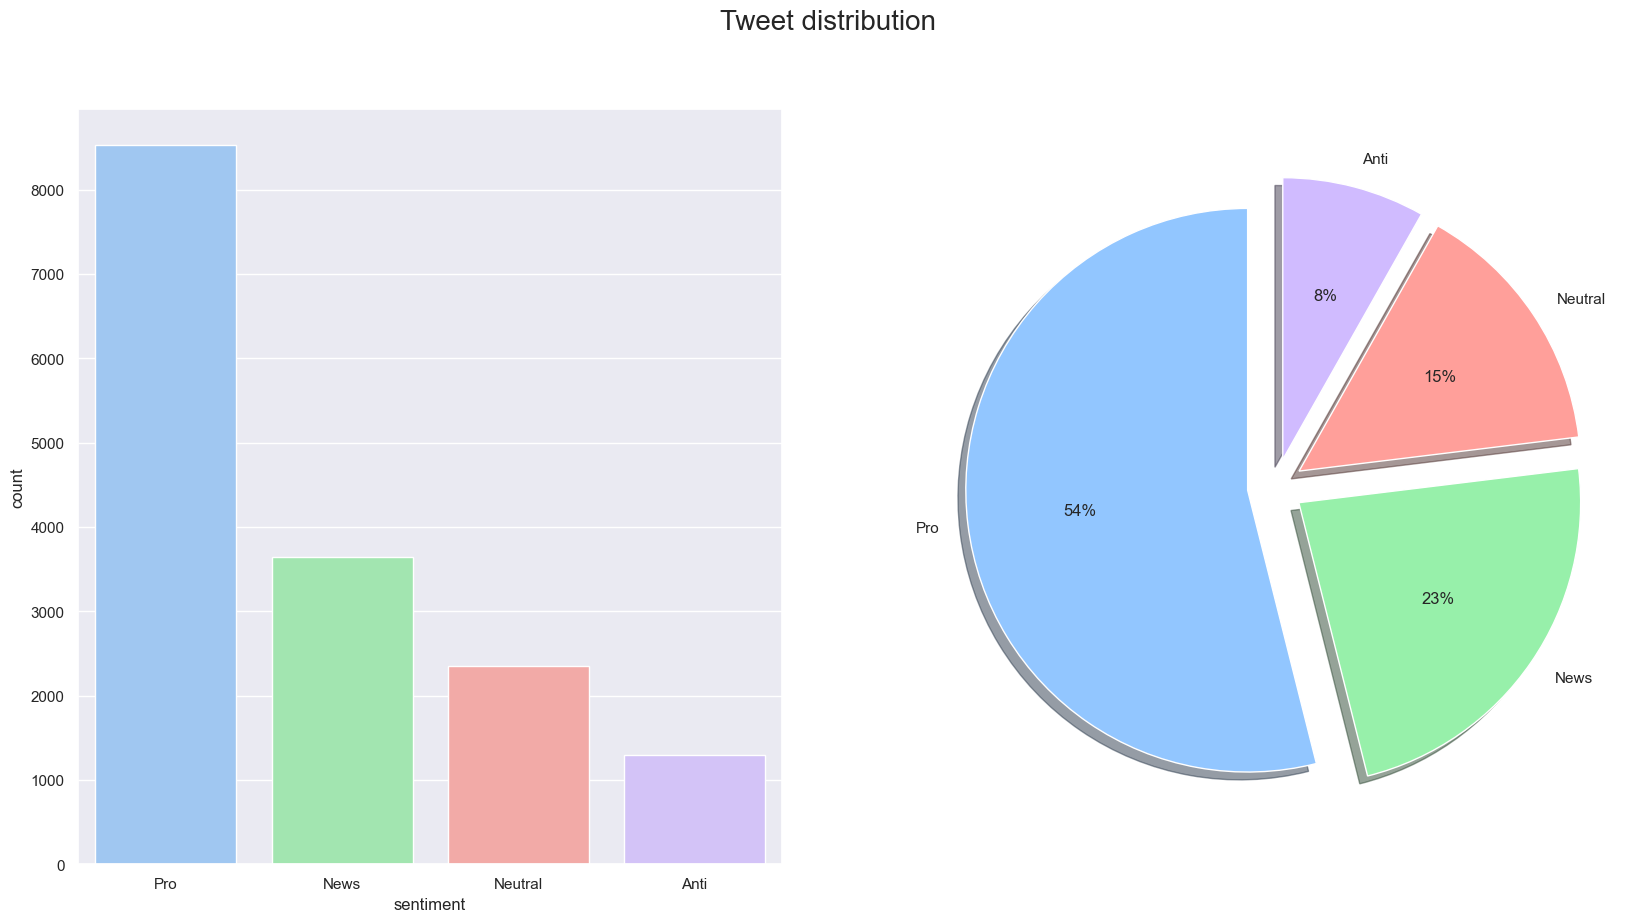

In [19]:
# observing numerical distribution

#Display target distribution
import matplotlib.style as style
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(df['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(df['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()




# values = working_df['sentiment'].value_counts()/working_df.shape[0]
# labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
# colors = ['red', 'green', 'yellow', 'blue']
# plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.03, 0, 0, 0), colors=colors)
# plt.show(20,20)

The train data set consists of an uneven percentage of data distribution between the sentiment classification values.

- Positive tweets consists of 53.92% of the total tweets.

- Negative tweets consists of 8.19% of the total tweets.

- Neutral tweets consists 14.87% of the total tweets.

- News tweets consists 23.02% of the total tweets.

After observing our Pie-Chart above you can see than more than half of the sample tweets come from positive sentiments, tweets from sentiment that do not believe in man-made climate change are the least and News are the second most popular.

##### Here we will be looking at the length of messages grouped by each sentiment value

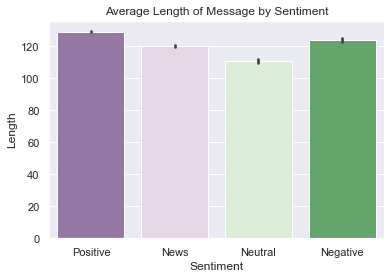

In [20]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

Text(0.5, 1.0, 'Distribution of target labels')

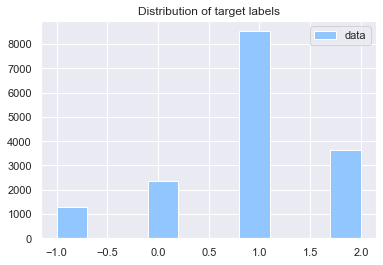

In [21]:
# Visualizing the distribution of the target 
plt.hist(df_train['sentiment'], label='data');
plt.legend();
plt.title('Distribution of target labels')

In [22]:
full_text = ' '.join(df_train_copy['message'])

<br>

### 3.4) WordCloud for most frequent words before data cleaning :

In [23]:
gb = df_train.groupby('sentiment') # get the groupby object

In [24]:
Positive = ''.join(gb.get_group(1)['message']) # extract messages from the positive sentiment
Negative = ''.join(gb.get_group(-1)['message']) # extract messages from the negative sentiment
Neutral = ''.join(gb.get_group(0)['message']) # extract messages from the neutral sentiment
News = ''.join(gb.get_group(2)['message']) # extract messages from the news sentiment

##### Below we look at the WordCloud from all sentiments

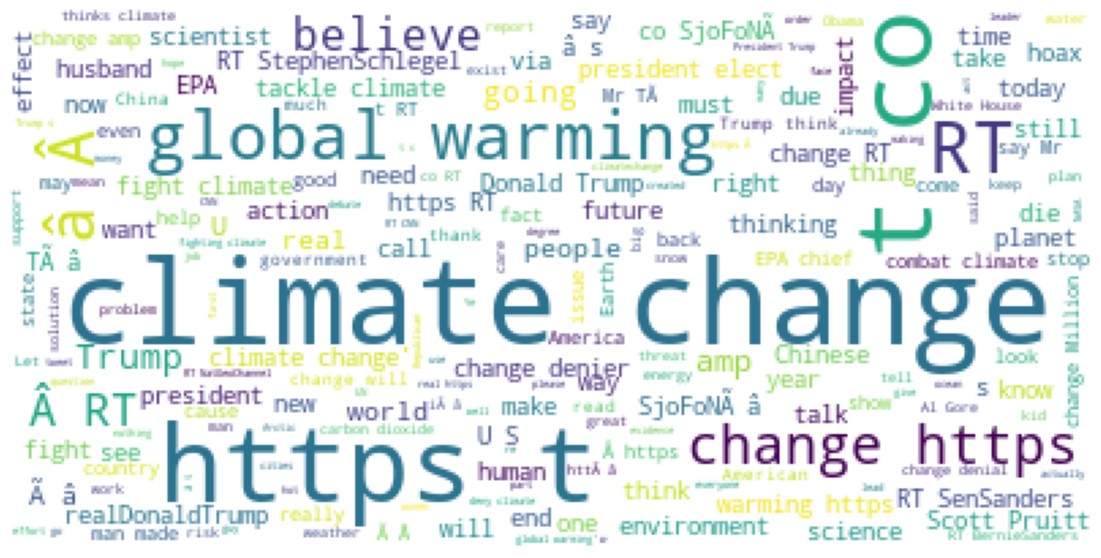

In [25]:
wc = WordCloud(background_color='white')
img = wc.generate(full_text)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

##### Below we look at the WordCloud for Positive sentiments

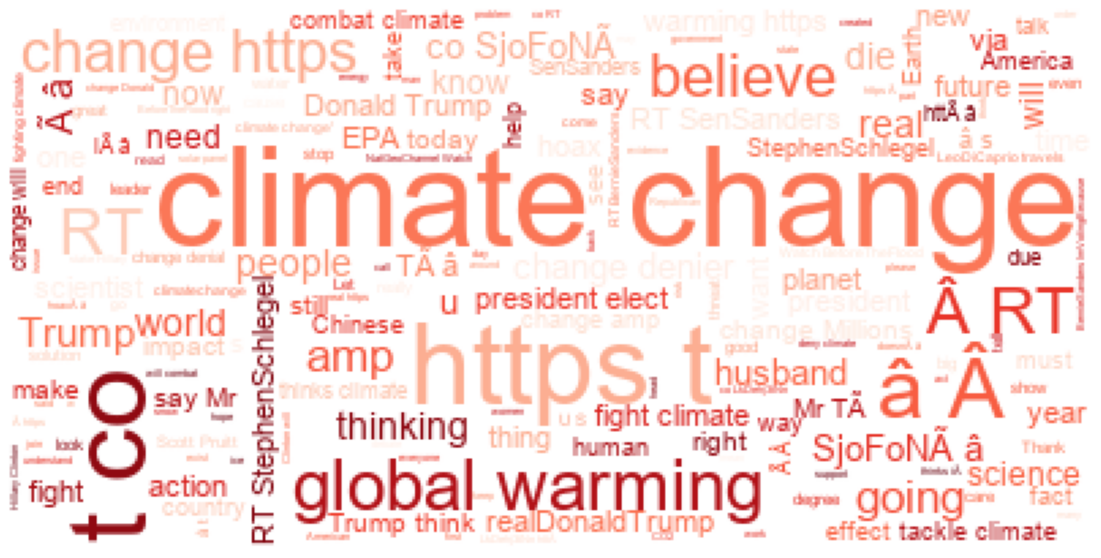

In [26]:
wc = WordCloud(background_color='white',colormap = 'Reds',font_path = 'arial')
img = wc.generate(Positive)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

gb = df_train.groupby('sentiment')

##### Below we look at the WordCloud for Negative sentiments

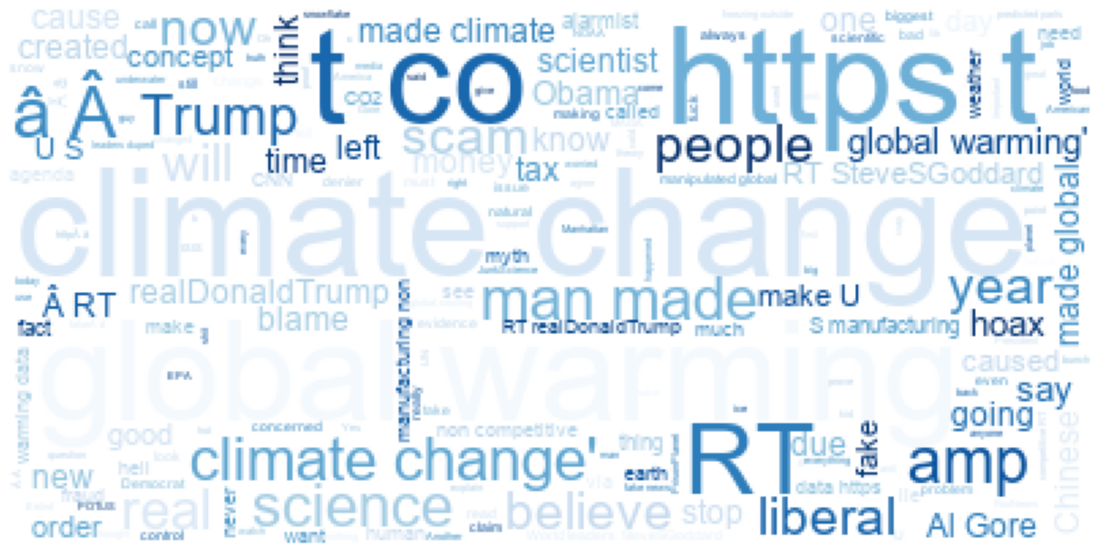

In [27]:
wc = WordCloud(background_color='white',colormap = 'Blues',font_path = 'arial')
img = wc.generate(Negative)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

##### Below we look at the WordCloud for Neutral sentiments

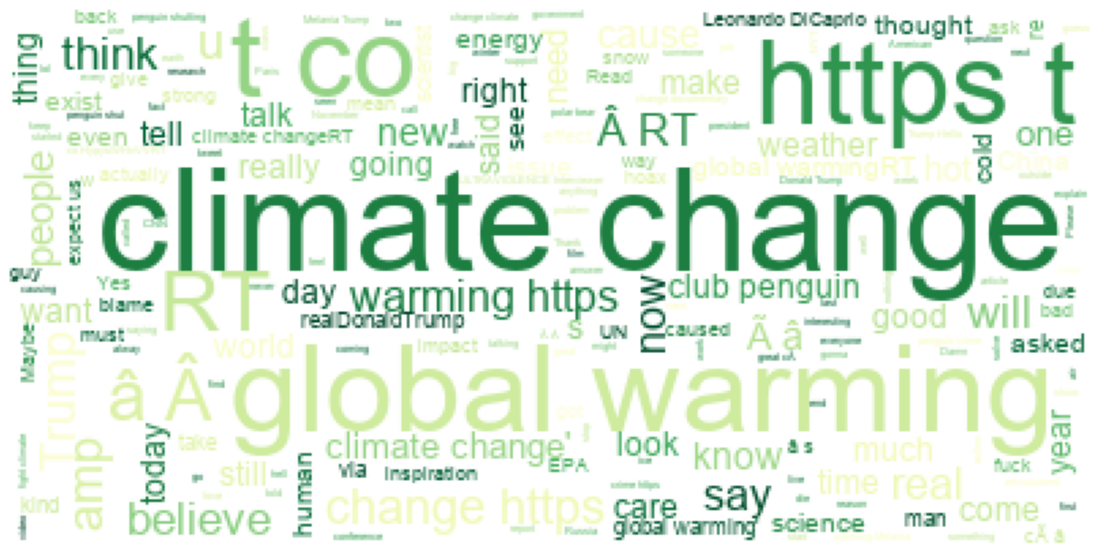

In [28]:
wc = WordCloud(background_color='white',colormap = 'YlGn',font_path = 'arial')
img = wc.generate(Neutral)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

##### Below we look at the WordCloud for News sentiments

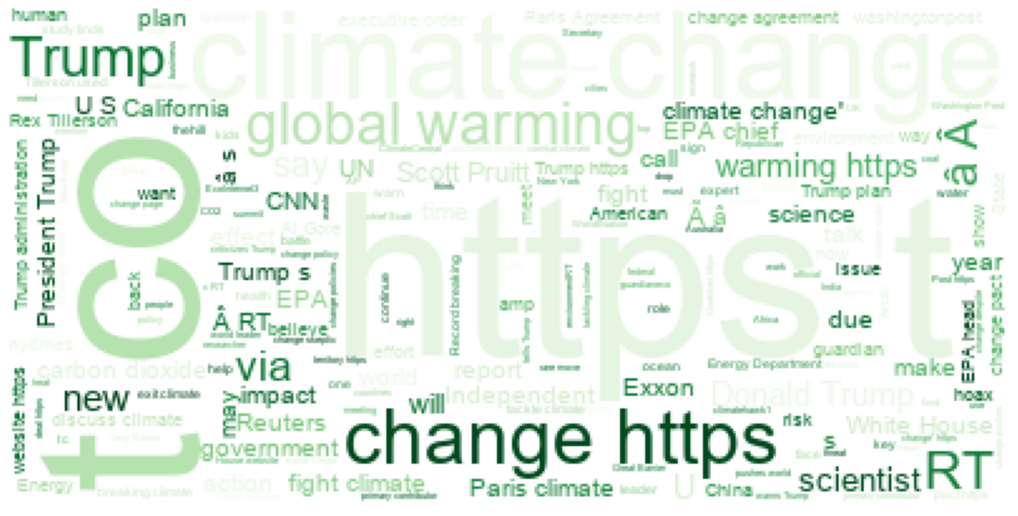

In [29]:
wc = WordCloud(background_color='white',
                           colormap="Greens",font_path = 'arial')
img = wc.generate(News)
plt.figure(figsize=(18,10))
plt.imshow(img)
plt.axis('off')
plt.show()

##### The function below followed by the additional syntax is for the purpose of grouping the tweets into their various sentiment classes. 



In [30]:
# Function to group tweets according to sentiment classes   
def feature_count(argu):
    sentiment_df = df_train_copy[df_train_copy['message'].str.contains(argu)]
    sentiment_df = (sentiment_df.groupby('sentiment').count()/df.groupby('sentiment').count())*100
    sentiment_df['percentage'] = sentiment_df['message']
    sentiment_df = sentiment_df[['percentage']]
    
    return sentiment_df

# Group tweet sentiment classes
grouped = df_train_copy.groupby(df_train_copy.sentiment)
deny_df = grouped.get_group('Negative')
pro_df = grouped.get_group('Positive')
media_df = grouped.get_group('News')
neutral_df = grouped.get_group('Neutral')

import itertools
import collections
# Create a list of lists containing lowercase words for each tweet
words_in_all_tweet = [tweet.split() for tweet in df_train_copy['message']]
deny_tweets_list = [deny_tweet.split() for deny_tweet in deny_df['message']]
pro_tweets_list = [pro_tweet.split() for pro_tweet in pro_df['message']]
media_tweets_list = [media_tweet.split() for media_tweet in media_df['message']]
neutral_tweets_list = [neutral_tweet.split() for neutral_tweet in neutral_df['message']]


# List of all words across tweets
clean_message_all_list= list(itertools.chain(*words_in_all_tweet))
clean_message_list_deny= list(itertools.chain(*deny_tweets_list))
clean_message_list_pro= list(itertools.chain(*pro_tweets_list))
clean_message_list_meida= list(itertools.chain(*media_tweets_list))
clean_message_list_neutral= list(itertools.chain(*neutral_tweets_list))

# Create counter
counts_clean_message_all = collections.Counter(clean_message_all_list)
counts_clean_message_deny = collections.Counter(clean_message_list_deny)
counts_clean_message_pro = collections.Counter(clean_message_list_pro)
counts_clean_message_media= collections.Counter(clean_message_list_meida)
counts_clean_message_neutral = collections.Counter(clean_message_list_neutral)

common_words_number = 15
counts_clean_message_all.most_common(common_words_number)
counts_clean_message_deny.most_common(common_words_number)
counts_clean_message_pro.most_common(common_words_number)
counts_clean_message_media.most_common(common_words_number)
counts_clean_message_neutral.most_common(common_words_number)

# Build a Dataframe of the words in the tweets as well as their count
tweet_word_counts_all = pd.DataFrame(counts_clean_message_all.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_deny = pd.DataFrame(counts_clean_message_deny.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_pro = pd.DataFrame(counts_clean_message_pro.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_media = pd.DataFrame(counts_clean_message_media.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_neutral = pd.DataFrame(counts_clean_message_neutral.most_common(common_words_number),
                             columns=['words', 'count'])

### 3.5) Visualizing common words found in the various sentiment classes

Text(0.5, 1.0, 'Common Words Found in neutral tweets')

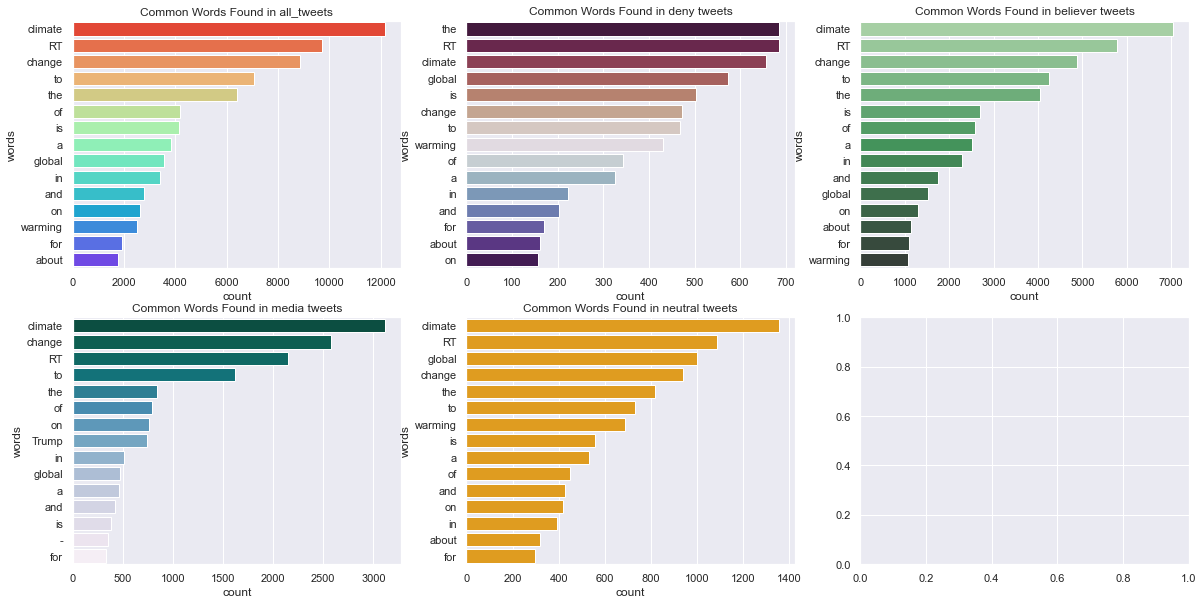

In [31]:
# Add some subplots showing the common words found in the various sentiment classes. 
sns.set(font_scale=1)
fig, axes = plt.subplots(2,3, figsize=(20, 10), squeeze=False)

# Most common words in all tweets
sns.barplot(y='words' ,x=tweet_word_counts_all['count'], 
            data = tweet_word_counts_all.sort_values(by='count', ascending=False), 
            ax=axes[0,0], palette = "rainbow_r", orient = 'h')
axes[0,0].set_title("Common Words Found in all_tweets") # Add title 

# Most common words in negative tweets
sns.barplot(y='words' ,x=tweet_word_counts_deny['count'], 
            data = tweet_word_counts_deny.sort_values(by='count', ascending=False),
            ax=axes[0,1], palette = "twilight_shifted_r", orient = 'h')
axes[0,1].set_title("Common Words Found in deny tweets") # Add title 

# Most common words in positive tweets
sns.barplot(y='words' ,x=tweet_word_counts_pro['count'], 
            data = tweet_word_counts_pro.sort_values(by='count', ascending=False),
            ax=axes[0,2], palette = "Greens_d", orient = 'h')
axes[0,2].set_title("Common Words Found in believer tweets") # Add title 

# Most common words in news-related tweets
sns.barplot(y='words' ,x=tweet_word_counts_media['count'], 
            data = tweet_word_counts_media.sort_values(by='count', ascending=False),
            ax=axes[1,0], palette = "PuBuGn_r", orient = 'h')
axes[1,0].set_title("Common Words Found in media tweets") # Add title 

# Most common words in neutral tweets
sns.barplot(y='words' ,x=tweet_word_counts_neutral['count'], 
            data = tweet_word_counts_neutral.sort_values(by='count', ascending=False),
            ax=axes[1,1], color = 'orange', orient = 'h')
axes[1,1].set_title("Common Words Found in neutral tweets") # Add title 

<a id="four"></a>
## 4. Sentiment Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Sentiment Analysis ⚡ |
| :--------------------------- |
| In this section we do sentiment analysis, and possibly create new features - as identified in the EDA phase. |

---

### 4.1) Data cleaning

#### Next we will clean the data, removing noise, URL hyperlinks, stopwords and lemmatize the text

In [32]:
def preprocess(text):
    """This function takes in pandas dataframe, removes URL hyperlinks, stopwords, punctuation noises, and lemmatize the text."""

    tokenizer = TreebankWordTokenizer() 
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words('english')
    noise = string.punctuation + '0123456789'
    
    cleanText = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', "", text) # remove URLs
    cleanText = re.sub(r'@[a-zA-Z0-9\_\w]+', '', cleanText) # remove mentions using @
    cleanText = re.sub(r'#[a-zA-Z0-9]+', '', cleanText) # remove hashtags using #
    cleanText = re.sub(r'RT', '', cleanText) # remove retweets using RT
    cleanText = cleanText.lower() # transform text to lower case
    cleanText = re.sub(r'([https][http][htt][th][ht])', "", cleanText)
    cleanText = ''.join([word for word in cleanText if word not in noise]) # remove special characters and digits.
    cleanText = "".join(word for word in cleanText if ord(word)<128) # removing non-Ascii
    cleanText = tokenizer.tokenize(cleanText) # transform words to tokens
    cleanText = [lemmatizer.lemmatize(word) for word in cleanText if word not in stopwords_list] # lemmatize and remove stopwords
    cleanText = [word for word in cleanText if len(word) >= 2]
    cleanText = ' '.join(cleanText)

    return cleanText # return cleanText

In [33]:
pro = preprocess(Positive)
anti = preprocess(Negative)
Neut = preprocess(Neutral)
New_news = preprocess(News)

### 4.2) WordCloud for most frequent words after data cleaning :

In [34]:

# Create wordcloud for the anti climate change class
anti_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(anti)

# Create wordcolud for the pro climate change class
pro_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro)

# Create wordcolud for the news climate change class
news_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(New_news)

# Create wordcolud for the neutral climate change class
neutral_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(Neut)


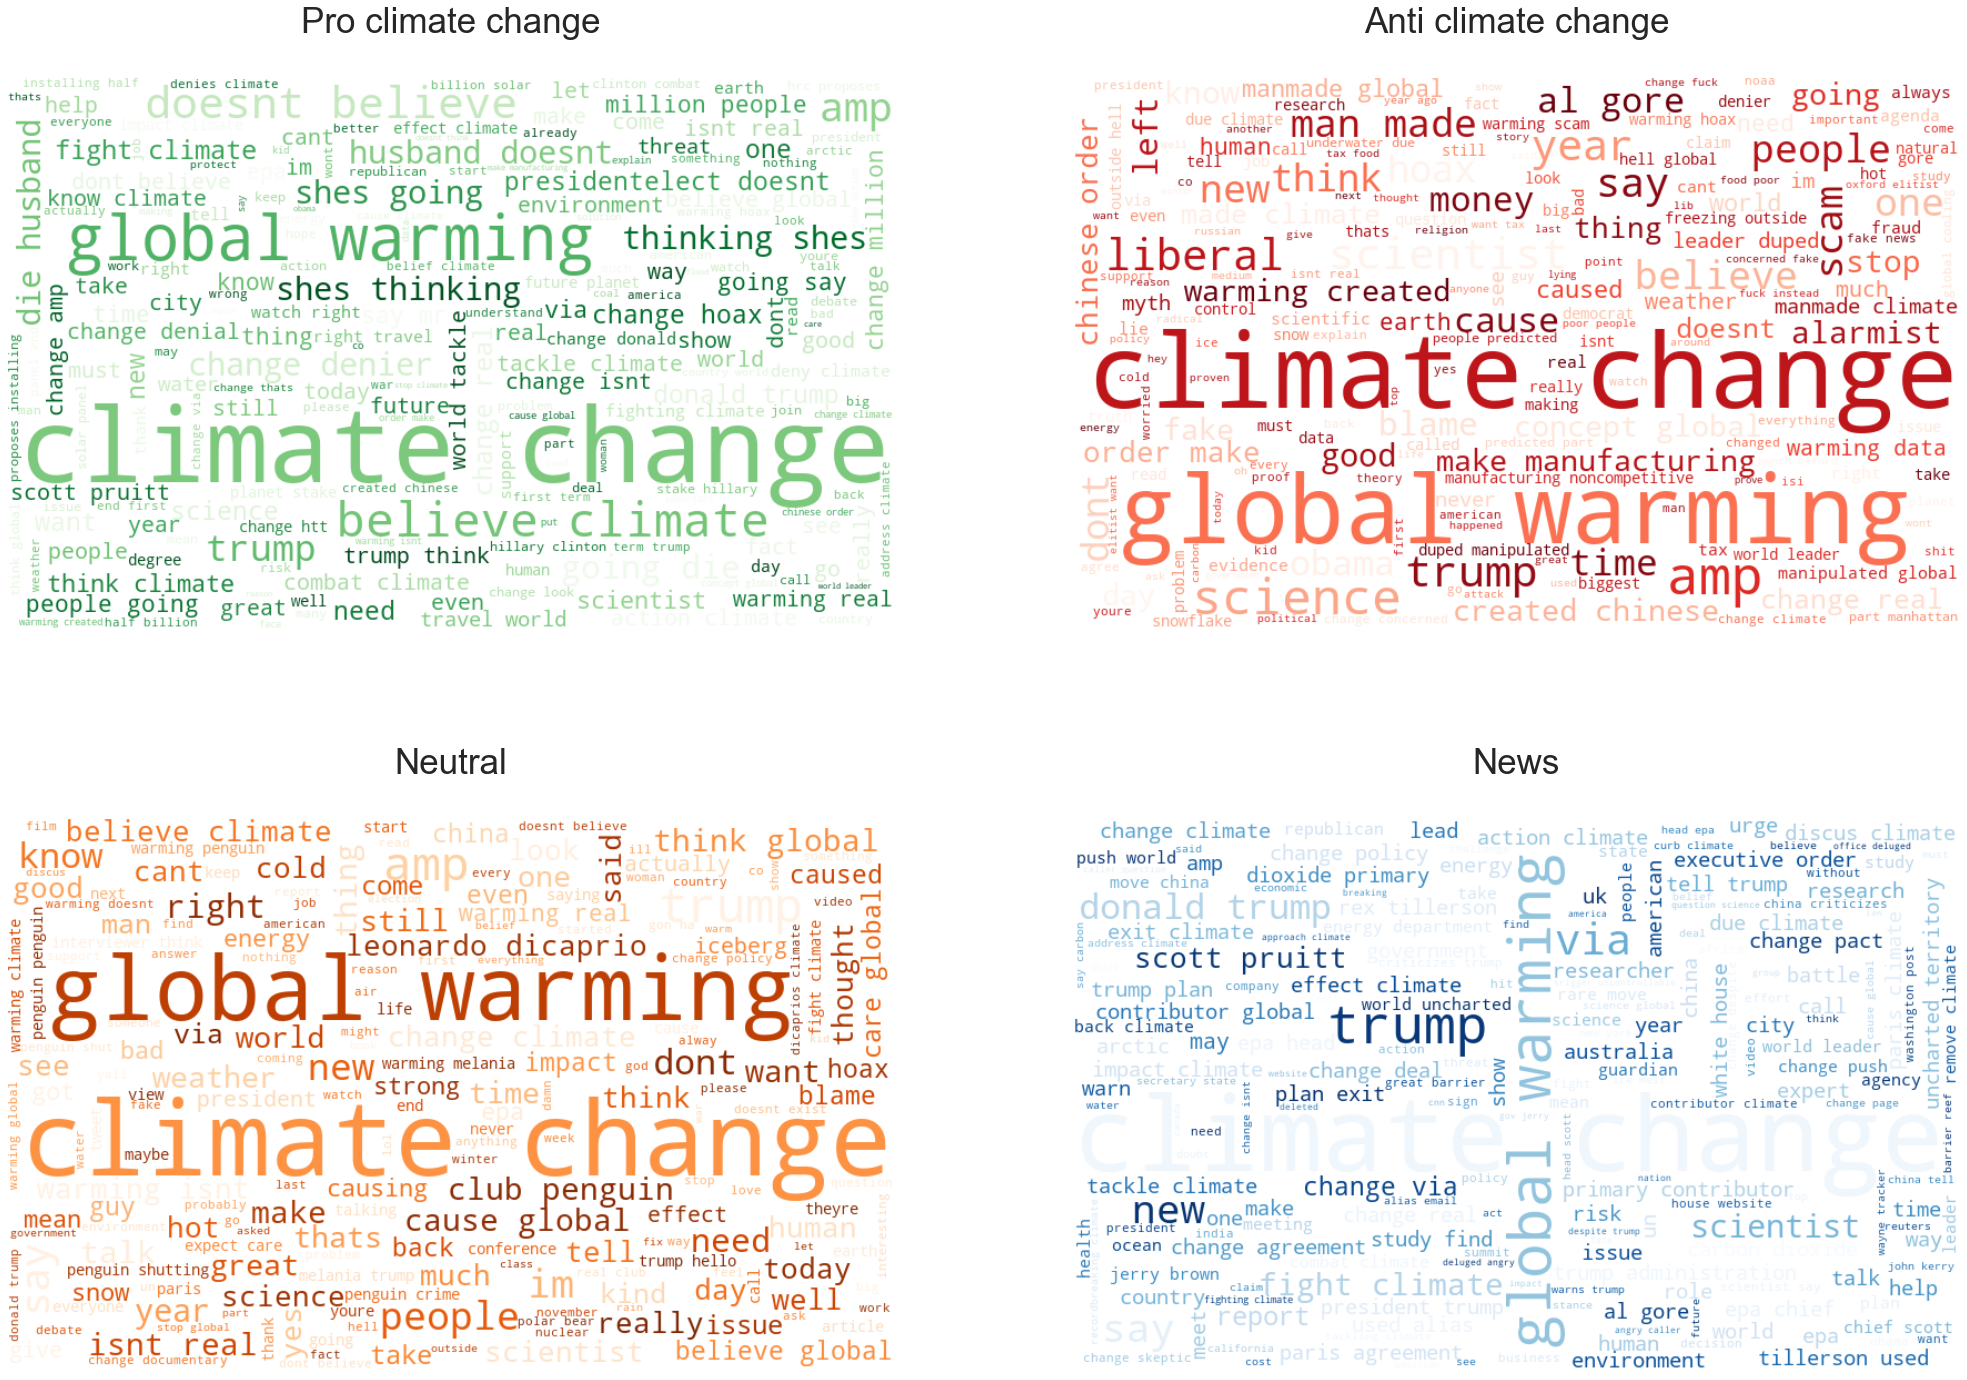

In [35]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

<br>

### 4.3) Building vectorizer:


The Vectorizer will be used to transform our data to numerical numbers 

In [36]:
stem = df_train['message']
stem_vectrz = CountVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.5)
stem_msg_vec = stem_vectrz.fit_transform(stem)
print('Number of features in [stem]:', len(stem_vectrz.get_feature_names()))
X_stem = stem_msg_vec
y = df_train['sentiment']

Number of features in [stem]: 10668


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_stem, y, test_size=0.2, random_state=42)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we create one or more classification models that are able to accurately classify if people believe in climate change or not. |

---

#### 5.1) SupportVector Classifier:

In [ ]:
SW_uni = SVC(C = 0.1, degree = 1, kernel = 'linear')
SW_uni.fit(X_train,y_train)
y_pred = SW_uni.predict(X_test)
# print(classification_report(y_test, y_pred))

#### 5.2) LogisticRegression Classifier:

In [24]:
LFC = LogisticRegression()
LFC.fit(X_train,y_train)
y_pred = LFC.predict(X_test)
# print(classification_report(y_test, y_pred))

#### 5.3) RandomForest Classifier:

In [42]:
RFC = RandomForestClassifier() 
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
# print(classification_report(y_test, y_pred))

#### 5.4) Linear SupportVector Classifier:

In [60]:
LSC = LinearSVC(C=0.1, class_weight='balanced',max_iter=1800)
LSC.fit(X_train,y_train)
y_pred = LSC.predict(X_test)
# print(classification_report(y_test, y_pred))

#### 5.5)  GradientBoosting Classifier:

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
clfs = GradientBoostingClassifier()
clfs.fit(X_train,y_train)
y_pred = clfs.predict(X_test)
# print(classification_report(y_test, y_pred))

#### 5.6) AdaBoost Classifier:

In [62]:
from sklearn.ensemble import AdaBoostClassifier
cl = AdaBoostClassifier()
cl.fit(X_train,y_train)
y_pred = cl.predict(X_test)
# print(classification_report(y_test, y_pred))

#### 5.7) CatBoost Classifier:

In [29]:
import catboost
from catboost import CatBoostClassifier
CBC = CatBoostClassifier(depth= 9,iterations = 30,learning_rate= 0.01)
CBC.fit(X_train,y_train)
y_pred = CBC.predict(X_test)
# print(classification_report(y_test, y_pred))

0:	learn: 1.3804757	total: 404ms	remaining: 11.7s
1:	learn: 1.3740893	total: 648ms	remaining: 9.08s
2:	learn: 1.3679508	total: 902ms	remaining: 8.12s
3:	learn: 1.3621519	total: 1.15s	remaining: 7.5s
4:	learn: 1.3565034	total: 1.4s	remaining: 6.99s
5:	learn: 1.3507615	total: 1.65s	remaining: 6.59s
6:	learn: 1.3447823	total: 1.9s	remaining: 6.25s
7:	learn: 1.3394700	total: 2.15s	remaining: 5.92s
8:	learn: 1.3341375	total: 2.42s	remaining: 5.65s
9:	learn: 1.3293381	total: 2.69s	remaining: 5.38s
10:	learn: 1.3244419	total: 2.95s	remaining: 5.09s
11:	learn: 1.3193319	total: 3.22s	remaining: 4.84s
12:	learn: 1.3144100	total: 3.49s	remaining: 4.56s
13:	learn: 1.3100665	total: 3.74s	remaining: 4.27s
14:	learn: 1.3053650	total: 4s	remaining: 4s
15:	learn: 1.3006838	total: 4.24s	remaining: 3.71s
16:	learn: 1.2963105	total: 4.49s	remaining: 3.43s
17:	learn: 1.2915703	total: 4.75s	remaining: 3.16s
18:	learn: 1.2875557	total: 5.01s	remaining: 2.9s
19:	learn: 1.2834811	total: 5.29s	remaining: 2.64s


#### 5.8) Stacking Classifier:

In [49]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(
    estimators=[  
        ('LSC', LSC), 
        ('LFC', LFC),
        ('SW_uni', SW_uni)
    ],
    final_estimator=CBC,
    n_jobs=1,
    passthrough=True,
)

In [75]:
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
# print(classification_report(y_test, y_pred))

0:	learn: 1.3721905	total: 328ms	remaining: 9.51s
1:	learn: 1.3585669	total: 635ms	remaining: 8.88s
2:	learn: 1.3457159	total: 1.15s	remaining: 10.3s
3:	learn: 1.3326154	total: 1.47s	remaining: 9.52s
4:	learn: 1.3204204	total: 1.85s	remaining: 9.27s
5:	learn: 1.3079182	total: 2.17s	remaining: 8.68s
6:	learn: 1.2959408	total: 2.5s	remaining: 8.21s
7:	learn: 1.2844876	total: 2.81s	remaining: 7.72s
8:	learn: 1.2736318	total: 3.1s	remaining: 7.24s
9:	learn: 1.2628193	total: 3.42s	remaining: 6.84s
10:	learn: 1.2520330	total: 3.71s	remaining: 6.42s
11:	learn: 1.2417942	total: 4.18s	remaining: 6.27s
12:	learn: 1.2316606	total: 4.81s	remaining: 6.29s
13:	learn: 1.2217910	total: 5.54s	remaining: 6.34s
14:	learn: 1.2124758	total: 6.26s	remaining: 6.26s
15:	learn: 1.2032586	total: 6.9s	remaining: 6.04s
16:	learn: 1.1945122	total: 7.54s	remaining: 5.76s
17:	learn: 1.1856740	total: 8.16s	remaining: 5.44s
18:	learn: 1.1769240	total: 8.77s	remaining: 5.08s
19:	learn: 1.1686906	total: 9.38s	remaining:

In [32]:
def preprocess(df: pd.DataFrame):
    return stem_vectrz.transform(df['message'])

In [33]:
def generate_submission(model, pred_X):
    y_pred = model.predict(pred_X) # prediction
    submission = { # submission
        "tweetid": df_test['tweetid'].values,
        "sentiment": y_pred,
    }
    return pd.DataFrame(submission).set_index('tweetid')

In [34]:
pred_X = preprocess(df_test)

In [35]:
pred_X.shape

(10546, 10668)

In [36]:
submit_df = generate_submission(sc, pred_X)
submit_df.to_csv('SC.csv')
print("Submission Generated")

Submission Generated


In [ ]:
# import pickle

# model_save_path = "CW3.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(CW3,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### 6.1) Model accuracy & F1-scores

##### The Linear Support Vector Classifier (SVC):


In [40]:
LSC = LinearSVC(C=0.1, class_weight='balanced',max_iter=1800)
LSC.fit(X_train,y_train)
y_pred = LSC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.57      0.58       278
           0       0.47      0.57      0.52       425
           1       0.84      0.78      0.81      1755
           2       0.75      0.81      0.78       706

    accuracy                           0.74      3164
   macro avg       0.66      0.68      0.67      3164
weighted avg       0.75      0.74      0.74      3164



##### LogisticRegression Classifier:

In [46]:
LFC = LogisticRegression()
LFC.fit(X_train,y_train)
y_pred = LFC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.70      0.49      0.57       278
           0       0.50      0.49      0.50       425
           1       0.80      0.85      0.82      1755
           2       0.79      0.78      0.78       706

    accuracy                           0.75      3164
   macro avg       0.70      0.65      0.67      3164
weighted avg       0.75      0.75      0.75      3164



##### RandomForest Classifier:

In [47]:
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.84      0.27      0.40       278
           0       0.55      0.32      0.40       425
           1       0.72      0.91      0.80      1755
           2       0.80      0.68      0.74       706

    accuracy                           0.72      3164
   macro avg       0.73      0.54      0.59      3164
weighted avg       0.72      0.72      0.70      3164



##### GradientBoosting Classifier:

In [42]:
clfs.fit(X_train,y_train)
y_pred = clfs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.87      0.26      0.40       278
           0       0.65      0.24      0.35       425
           1       0.68      0.92      0.78      1755
           2       0.75      0.57      0.65       706

    accuracy                           0.69      3164
   macro avg       0.74      0.50      0.55      3164
weighted avg       0.71      0.69      0.66      3164



##### CatBoost Classifier:

In [54]:
CBC = CatBoostClassifier(depth= 9,iterations = 30,learning_rate= 0.01)
CBC.fit(X_train,y_train)
y_pred = CBC.predict(X_test)
print(classification_report(y_test, y_pred))

0:	learn: 1.3804757	total: 283ms	remaining: 8.22s
1:	learn: 1.3740893	total: 547ms	remaining: 7.65s
2:	learn: 1.3679508	total: 792ms	remaining: 7.12s
3:	learn: 1.3621519	total: 1.07s	remaining: 6.94s
4:	learn: 1.3565034	total: 1.33s	remaining: 6.64s
5:	learn: 1.3507615	total: 1.6s	remaining: 6.41s
6:	learn: 1.3447823	total: 1.88s	remaining: 6.17s
7:	learn: 1.3394700	total: 2.15s	remaining: 5.92s
8:	learn: 1.3341375	total: 2.4s	remaining: 5.6s
9:	learn: 1.3293381	total: 2.66s	remaining: 5.32s
10:	learn: 1.3244419	total: 2.94s	remaining: 5.07s
11:	learn: 1.3193319	total: 3.2s	remaining: 4.8s
12:	learn: 1.3144100	total: 3.46s	remaining: 4.52s
13:	learn: 1.3100665	total: 3.69s	remaining: 4.22s
14:	learn: 1.3053650	total: 3.95s	remaining: 3.95s
15:	learn: 1.3006838	total: 4.18s	remaining: 3.66s
16:	learn: 1.2963105	total: 4.45s	remaining: 3.41s
17:	learn: 1.2915703	total: 4.69s	remaining: 3.12s
18:	learn: 1.2875557	total: 4.96s	remaining: 2.87s
19:	learn: 1.2834811	total: 5.24s	remaining: 2

##### Stacking Classifier:

In [55]:
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
print(classification_report(y_test, y_pred))

0:	learn: 1.3721905	total: 296ms	remaining: 8.6s
1:	learn: 1.3585669	total: 591ms	remaining: 8.27s
2:	learn: 1.3457159	total: 898ms	remaining: 8.08s
3:	learn: 1.3326154	total: 1.2s	remaining: 7.83s
4:	learn: 1.3204204	total: 1.54s	remaining: 7.72s
5:	learn: 1.3079182	total: 1.86s	remaining: 7.46s
6:	learn: 1.2959408	total: 2.21s	remaining: 7.26s
7:	learn: 1.2844876	total: 2.54s	remaining: 6.98s
8:	learn: 1.2736318	total: 2.88s	remaining: 6.71s
9:	learn: 1.2628193	total: 3.21s	remaining: 6.42s
10:	learn: 1.2520330	total: 3.53s	remaining: 6.1s
11:	learn: 1.2417942	total: 3.86s	remaining: 5.79s
12:	learn: 1.2316606	total: 4.19s	remaining: 5.48s
13:	learn: 1.2217910	total: 4.51s	remaining: 5.16s
14:	learn: 1.2124758	total: 4.85s	remaining: 4.85s
15:	learn: 1.2032586	total: 5.16s	remaining: 4.51s
16:	learn: 1.1945122	total: 5.48s	remaining: 4.19s
17:	learn: 1.1856740	total: 5.84s	remaining: 3.89s
18:	learn: 1.1769240	total: 6.2s	remaining: 3.59s
19:	learn: 1.1686906	total: 6.57s	remaining: 

##### AdaBoost Classifier:

In [67]:
cl = AdaBoostClassifier()
cl.fit(X_train,y_train)
y_pred = cl.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.69      0.29      0.41       278
           0       0.42      0.21      0.28       425
           1       0.67      0.85      0.75      1755
           2       0.62      0.53      0.57       706

    accuracy                           0.64      3164
   macro avg       0.60      0.47      0.50      3164
weighted avg       0.63      0.64      0.62      3164



##### SupportVector Classifier:

In [65]:
SW_uni = SVC(C = 0.1, degree = 1, kernel = 'linear')
SW_uni.fit(X_train,y_train)
y_pred = SW_uni.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.76      0.44      0.56       278
           0       0.57      0.47      0.52       425
           1       0.79      0.86      0.82      1755
           2       0.76      0.77      0.77       706

    accuracy                           0.75      3164
   macro avg       0.72      0.64      0.67      3164
weighted avg       0.75      0.75      0.75      3164



### 6.2) Model comparisson

##### Plotting the accuracy data into graph:

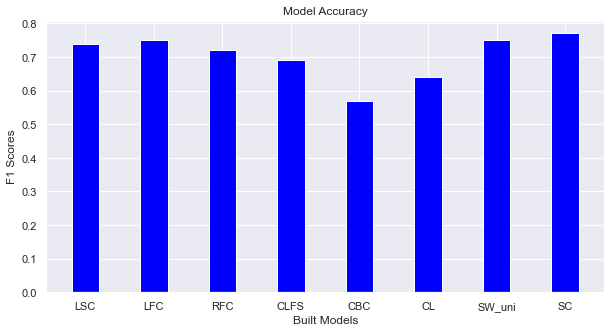

In [78]:
# creating the dataset
data = {'LSC':0.74, 'LFC':0.75, 'RFC':0.72,
        'CLFS':0.69,'CBC':0.57,'CL':0.64,'SW_uni':0.75,'SC':0.77}
Models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Built Models")
plt.ylabel("F1 Scores")
plt.title("Model Accuracy")
plt.show()

In [76]:
print('Highest Accuracy score: '+ "..........."+str(0.77))
print('Best model: ' +'..........'+ 'Stacking Classifier (SC)')

Highest Accuracy score: ...........0.77
Best model: ..........Stacking Classifier (SC)


#### Model Selected:

After evaluating each models Classifiaction Report and looking at the Bar chart.
We have come to the conclusion that the model that we chose was the Stacking Classifier, as it was 
the model with the highest Accuracy Score.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic